In [150]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [151]:


columns_list=list(range(1,281))
columns_list
data = pd.read_csv('cardiac_arrhythmia.csv',header=None,names=columns_list)


In [152]:
data.head()

,1,2,3,4,5,6,7,8,9,10,...,271,272,273,274,275,276,277,278,279,280
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0,-0.1,3.9,25.4,62.8,7


In [153]:
data.shape

(452, 280)

In [154]:
data.describe()

,1,2,3,4,5,6,7,8,9,10,...,271,272,273,274,275,276,277,278,279,280
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,...,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000
mean,46.471239,0.550885,166.188053,68.170354,88.920354,155.152655,367.207965,169.949115,90.004425,33.676991,...,-0.278982,9.048009,-1.457301,0.003982,0.0,0.514823,1.222345,19.326106,29.473230,3.880531
std,16.466631,0.497955,37.170340,16.590803,15.364394,44.842283,33.385421,35.633072,25.826643,45.431434,...,0.548876,3.472862,2.002430,0.050118,0.0,0.347531,1.426052,13.503922,18.493927,4.407097
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,...,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000,1.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,3.750000,...,-0.425000,6.600000,-2.100000,0.000000,0.0,0.400000,0.500000,11.450000,17.550000,1.000000
50%,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,91.000000,40.000000,...,0.000000,8.800000,-1.100000,0.000000,0.0,0.500000,1.350000,18.100000,27.900000,1.000000
75%,58.000000,1.000000,170.000000,79.000000,94.000000,175.000000,384.000000,179.000000,102.000000,66.000000,...,0.000000,11.200000,0.000000,0.000000,0.0,0.700000,2.100000,25.825000,41.125000,6.000000
max,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,169.000000,...,0.000000,23.600000,0.000000,0.800000,0.0,2.400000,6.000000,88.800000,115.900000,16.000000


In [155]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Columns: 280 entries, 1 to 280
dtypes: float64(116), int64(159), object(5)
memory usage: 988.8+ KB


In [156]:
object_data=data.select_dtypes(include=['object'], exclude=['float64','int64'])
object_data.describe()

,11,12,13,14,15
count,452,452,452,452,452
unique,171,102,135,70,64
top,52,60,59,?,72
freq,13,23,9,376,21


In [157]:
#Replacing '?' with NAn
#data=data.replace(to_replace='?', value=np.nan, inplace=False, limit=None, regex=False, method='pad', axis=None)
data=data.replace('?', np.NaN)
object_data=data.select_dtypes(include=['object'], exclude=['float64','int64'])
object_data.describe()

,11,12,13,14,15
count,444,430,451,76,451
unique,170,101,134,69,63
top,52,60,59,84,72
freq,13,23,9,3,21


In [2]:
data.info()

NameError: name 'data' is not defined

In [159]:
# changing datatype to float from object
data_object=data.select_dtypes(include=['object'], exclude=['float64','int64']).astype(float)
data_float=data.select_dtypes(include=['float64','int64'], exclude=['object'])
data_new=pd.concat([data_object,data_float],axis = 1)
data_new.info()
#Converted all columns of datatypes into float (total - 116+5=121 float columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Columns: 280 entries, 11 to 280
dtypes: float64(121), int64(159)
memory usage: 988.8 KB


In [160]:
data_new.columns

Int64Index([ 11,  12,  13,  14,  15,   1,   2,   3,   4,   5,
            ...
            271, 272, 273, 274, 275, 276, 277, 278, 279, 280],
           dtype='int64', length=280)

In [161]:
data_numeric=data.astype(float)
data_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Columns: 280 entries, 1 to 280
dtypes: float64(280)
memory usage: 988.8 KB


In [162]:
#Imputation
from fancyimpute import KNN

data_numeric=data_numeric.select_dtypes(include=[np.float])
data_filled=pd.DataFrame(KNN(3).complete(data_numeric))

data_filled.columns = data_numeric.columns
data_filled.index = data_numeric.index
data_filled.head()



Imputing row 1/452 with 1 missing, elapsed time: 0.309
Imputing row 101/452 with 1 missing, elapsed time: 0.312
Imputing row 201/452 with 2 missing, elapsed time: 0.315
Imputing row 301/452 with 1 missing, elapsed time: 0.317
Imputing row 401/452 with 1 missing, elapsed time: 0.319


,1,2,3,4,5,6,7,8,9,10,...,271,272,273,274,275,276,277,278,279,280
0,75.0,0.0,190.0,80.0,91.0,193.0,371.0,174.0,121.0,-16.0,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8.0
1,56.0,1.0,165.0,64.0,81.0,174.0,401.0,149.0,39.0,25.0,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6.0
2,54.0,0.0,172.0,95.0,138.0,163.0,386.0,185.0,102.0,96.0,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10.0
3,55.0,0.0,175.0,94.0,100.0,202.0,380.0,179.0,143.0,28.0,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1.0
4,75.0,0.0,190.0,80.0,88.0,181.0,360.0,177.0,103.0,-16.0,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7.0


# Test Train Split

In [262]:
#Test Train Split
from sklearn.model_selection import train_test_split
X=data_filled.drop(280,axis=1)
y=data_filled[280]

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0, test_size=0.2)
len(X_train)

361

# Scaling

In [254]:
# Scaling Data USing MinMax scaler:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#test=test.select_dtypes(include=[np.float])
X_train=scaler.fit_transform(X)
# The same instance of the transformer can then be applied to some new test data unseen during the fit call: the same scaling and shifting operations will be applied to be consistent with the transformation performed on the train data
X_test= scaler.transform(X_test)

In [177]:
list_count=data_filled.isnull().sum(axis=0)>0
list_count.unique()

array([False], dtype=bool)

In [178]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# KNN Classifier

In [179]:
##KNN 

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': [2,3,4,5,6,7,8,9,10]}
grid_search = GridSearchCV(knn, param_grid, cv=10)
grid_search.fit(X_train,y_train)





C:\Users\Arthi\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:581: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [180]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
mean_test_score=grid_search.cv_results_["mean_test_score"]
k=[2, 3, 4, 5, 6, 7, 8, 9, 10]

Best parameters: {'n_neighbors': 5}
Best cross-validation score: 0.62


In [181]:
knn = KNeighborsClassifier(n_neighbors= 5)
knn.fit(X_train,y_train)
y_knn = knn.predict(X_test)
print('Train score: {0:0.2f}'.format(knn.score(X_train, y_train)))
print('Test score: {0:0.2f}'.format(knn.score(X_test, y_test)))

Train score: 0.66
Test score: 0.54


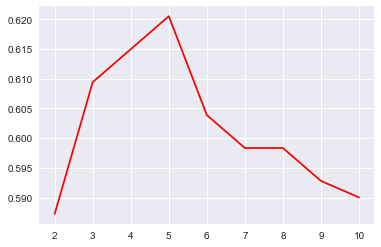

In [183]:
# plot between number of neighbours and test scores

import seaborn as sn
import matplotlib.pyplot as plt
% matplotlib inline 

plt.plot(k,mean_test_score,"r")

In [275]:
# Bagging for KNN mmodel
from sklearn.ensemble import BaggingClassifier
knn = KNeighborsClassifier(n_neighbors= 5)

bagging_clf = BaggingClassifier(knn, n_estimators = 100, max_samples=0.66,max_features = 50, bootstrap = True)
X=scaler.fit_transform(X)
bagging_clf.fit(X_train,y_train)
print('Train score: {0:0.2f}'.format(bagging_clf.score(X_train,y_train)))
print('Test score: {0:0.2f}'.format(bagging_clf.score(X_test,y_test)))


Train score: 0.64
Test score: 0.59


# Logistic Regression

In [265]:
from sklearn.linear_model import LogisticRegression

In [276]:
# Train multinomial logistic regression model

mul_lr = LogisticRegression(multi_class='multinomial', solver='newton-cg')
#Multinomial supports only l2 norm
from sklearn.model_selection import cross_val_score
scores = cross_val_score(mul_lr, X_train,y_train, cv = 5)
print("Cross validation scores: {}".format(scores))
scores.mean()

C:\Users\Arthi\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:581: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Arthi\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
C:\Users\Arthi\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
C:\Users\Arthi\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


Cross validation scores: [ 0.56410256  0.62162162  0.59722222  0.69565217  0.64705882]


C:\Users\Arthi\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


0.62513148107777261

In [279]:
mul_lr = LogisticRegression(multi_class='multinomial', solver='newton-cg')
mul_lr.fit(X_train,y_train)
y_mul_lr = mul_lr.predict(X_test)
print('Train score: {0:0.2f}'.format(mul_lr.score(X_train, y_train)))
print('Test score: {0:0.2f}'.format(mul_lr.score(X_test, y_test)))


Train score: 1.00
Test score: 0.58


C:\Users\Arthi\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


In [278]:
#since the test score is very low lets try with normal logistic regression
mul_lr = LogisticRegression()
param_grid = {'penalty':['l1', 'l2']}
grid_search = GridSearchCV(mul_lr , param_grid, cv = 10 , return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

mul_lr=LogisticRegression(penalty='l1')
mul_lr.fit(X_train,y_train)
y_mul_lr = mul_lr.predict(X_test)
print('Train score: {0:0.2f}'.format(mul_lr.score(X_train, y_train)))
print('Test score: {0:0.2f}'.format(mul_lr.score(X_test, y_test)))

C:\Users\Arthi\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:581: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Best parameters: {'penalty': 'l1'}
Best cross-validation score: 0.65
Train score: 1.00
Test score: 0.59


Using adaboost will not help as train score is already 1. Boosting will not help to increase the test  accuracy 

In [280]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_mul_lr))



[[34  3  0  0  0  5  0  0  6  0  0  1]
 [ 4  3  0  0  1  0  0  0  0  0  0  0]
 [ 0  1  3  0  0  0  0  0  0  0  0  1]
 [ 0  0  0  2  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  2  0  0  0  0  0  0  0]
 [ 1  1  0  0  0  2  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  1  0  0  0  0  0  7  0  0  2]
 [ 0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  1  0  0  2  0  0  0  0  1  0]]


In [281]:
print(classification_report(y_test,y_mul_lr))

             precision    recall  f1-score   support

        1.0       0.81      0.69      0.75        49
        2.0       0.27      0.38      0.32         8
        3.0       0.60      0.60      0.60         5
        4.0       0.67      1.00      0.80         2
        5.0       0.67      0.67      0.67         3
        6.0       0.22      0.50      0.31         4
        7.0       0.00      0.00      0.00         1
        9.0       0.00      0.00      0.00         1
       10.0       0.54      0.64      0.58        11
       14.0       0.00      0.00      0.00         1
       15.0       0.00      0.00      0.00         0
       16.0       0.00      0.00      0.00         6

avg / total       0.60      0.58      0.59        91



C:\Users\Arthi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Arthi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1115: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [282]:
#Bagging
mul_lr=LogisticRegression(penalty='l1')
bagging_clf = BaggingClassifier(mul_lr,n_estimators=50, max_samples=0.66, max_features = 50, bootstrap = True,oob_score=True)
X=scaler.fit_transform(X)
bagging_clf.fit(X_train,y_train)
print('Train score: {0:0.2f}'.format(bagging_clf.score(X_train,y_train)))
print('Test score: {0:0.2f}'.format(bagging_clf.score(X_test,y_test)))
print('out of bag score: {0:0.2f}'.format(bagging_clf.oob_score_))
# We get very low accuracy when we test data on very few observations since we have fifteen classes

Train score: 0.80
Test score: 0.62
out of bag score: 0.05


In [283]:
from sklearn.svm import LinearSVC

In [290]:
#SVC Support Vector Classifiers:

svc=LinearSVC()
param_grid={"C" : [1,10,100,1000,10000]}
grid_search = GridSearchCV(svc, param_grid, cv=10)
grid_search.fit(X_train, y_train)

C:\Users\Arthi\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:581: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


GridSearchCV(cv=10, error_score='raise',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [1, 10, 100, 1000, 10000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [291]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 1000}
Best cross-validation score: 0.67


In [292]:
#Further fine tuning the parameter to check for the best fit
param_grid={"C" : [500,750,1000,1500,2000,2500]}
grid_search = GridSearchCV(svc, param_grid, cv=10)
grid_search.fit(X_train, y_train)

C:\Users\Arthi\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:581: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


GridSearchCV(cv=10, error_score='raise',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [500, 750, 1000, 1500, 2000, 2500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [293]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 1500}
Best cross-validation score: 0.68


In [294]:
svc=LinearSVC(C= 1500 )
svc.fit(X_train,y_train)
y_svc_linear=svc.predict(X_test)
print('Train score: {0:0.2f}'.format(svc.score(X_train, y_train)))
print('Test score: {0:0.2f}'.format(svc.score(X_test, y_test)))

Train score: 0.98
Test score: 0.57


Using adaboost will not help as train score is almost 1. Boosting will not help to incraese the test  accuracy 

In [296]:
#Bagging
svc_linear=LinearSVC(C= 1500 )
bagging_clf = BaggingClassifier(svc_linear,n_estimators=50, max_samples=0.66, max_features = 50, bootstrap = True,oob_score=True)
X=scaler.fit_transform(X)
bagging_clf.fit(X_train,y_train)
print('Train score: {0:0.2f}'.format(bagging_clf.score(X_train,y_train)))
print('Test score: {0:0.2f}'.format(bagging_clf.score(X_test,y_test)))
#print('out of bag score: {0:0.2f}'.format(bagging_clf.oob_score_))

Train score: 0.79
Test score: 0.68


In [298]:
#Kerneralized SVCs, changing the kernel to 'poly' and 'rbf'
svc=SVC(kernel='poly')
param_grid={"gamma" : [0.01,0.1,1,10,100],"C" : [1,10,100,1000,10000],"degree" : [2,3]}
grid_search = GridSearchCV(svc, param_grid, cv=10)
grid_search.fit(X_train, y_train)

C:\Users\Arthi\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:581: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'gamma': [0.01, 0.1, 1, 10, 100], 'C': [1, 10, 100, 1000, 10000], 'degree': [2, 3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [299]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 1, 'degree': 2, 'gamma': 0.01}
Best cross-validation score: 0.68


In [300]:
#Further fine tuning the parameter to check for the best fit
svc=SVC(kernel='poly')
param_grid={"gamma" : [0.01,0.001,0.005,0.0005],"C" : [0.5,1,1.5,2,0.75],"degree" : [2,3]}
grid_search = GridSearchCV(svc, param_grid, cv=10)
grid_search.fit(X_train, y_train)

C:\Users\Arthi\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:581: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'gamma': [0.01, 0.001, 0.005, 0.0005], 'C': [0.5, 1, 1.5, 2, 0.75], 'degree': [2, 3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [301]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 0.5, 'degree': 2, 'gamma': 0.01}
Best cross-validation score: 0.68


In [302]:
svc=SVC(kernel='poly',C= 0.5 , degree=2 , gamma= 0.01)
svc.fit(X_train,y_train)
y_svc_poly=svc.predict(X_test)
print('Train score: {0:0.2f}'.format(svc.score(X_train, y_train)))
print('Test score: {0:0.2f}'.format(svc.score(X_test, y_test)))

Train score: 1.00
Test score: 0.65


In [304]:
#Bagging
svc_poly=SVC(kernel='poly',C= 0.5 , degree=2 , gamma= 0.01)
bagging_clf = BaggingClassifier(svc_poly,n_estimators=50, max_samples=0.66, max_features = 50, bootstrap = True,oob_score=True)
bagging_clf.fit(X_train,y_train)
print('Train score: {0:0.2f}'.format(bagging_clf.score(X_train,y_train)))
print('Test score: {0:0.2f}'.format(bagging_clf.score(X_test,y_test)))
#print('out of bag score: {0:0.2f}'.format(bagging_clf.oob_score_))

Train score: 0.91
Test score: 0.62


In [305]:
svc=SVC(kernel='rbf')
param_grid={"gamma" : [0.01,0.001,0.005,0.0005],"C" : [0.5,1,1.5,2,0.75],"degree" : [2,3]}
grid_search = GridSearchCV(svc, param_grid, cv=10)
grid_search.fit(X_train, y_train)

C:\Users\Arthi\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:581: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'gamma': [0.01, 0.001, 0.005, 0.0005], 'C': [0.5, 1, 1.5, 2, 0.75], 'degree': [2, 3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [306]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 0.5, 'degree': 2, 'gamma': 0.01}
Best cross-validation score: 0.54


In [307]:
svc=SVC(kernel='rbf',C= 0.5 , degree=2 , gamma= 0.01)
svc.fit(X_train,y_train)
y_svc_rbf=svc.predict(X_test)
print('Train score: {0:0.2f}'.format(svc.score(X_train, y_train)))
print('Test score: {0:0.2f}'.format(svc.score(X_test, y_test)))

Train score: 0.54
Test score: 0.54


In [309]:
#Bagging
svc_rbf=SVC(kernel='rbf',C= 0.5 , degree=2 , gamma= 0.01)
bagging_clf = BaggingClassifier(svc_rbf,n_estimators=50, max_samples=0.66, max_features = 50, bootstrap = True,oob_score=True)
X=scaler.fit_transform(X)
bagging_clf.fit(X_train,y_train)
print('Train score: {0:0.2f}'.format(bagging_clf.score(X_train,y_train)))
print('Test score: {0:0.2f}'.format(bagging_clf.score(X_test,y_test)))
print('out of bag score: {0:0.2f}'.format(bagging_clf.oob_score_))

Train score: 0.54
Test score: 0.54
out of bag score: 0.10


In [311]:
from sklearn.ensemble import AdaBoostClassifier

adaboost_clf = AdaBoostClassifier(base_estimator = svc_rbf, learning_rate = 0.5, algorithm='SAMME')
adaboost_clf.fit(X_train,y_train)

print('Train score: {0:0.2f}'.format(adaboost_clf.score(X_train, y_train)))
print('Test score: {0:0.2f}'.format(adaboost_clf.score(X_test, y_test)))

Train score: 0.54
Test score: 0.54


In [214]:
#Decision Trees
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
param_grid = {'max_depth': [5, 10, 20, 50, 100]}

grid_search = GridSearchCV(dt_clf, param_grid, cv = 10, return_train_score=True)
grid_search.fit(X_train, y_train)

C:\Users\Arthi\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:581: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [5, 10, 20, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [215]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))


Best parameters: {'max_depth': 5}
Best cross-validation score: 0.70


In [249]:
dt_clf = DecisionTreeClassifier(max_depth = 5)
dt_clf.fit(X_train,y_train)
#y_dt_clf = dt_clf.predict(X_test)
print('Train score: {0:0.2f}'.format(dt_clf.score(X_train, y_train)))
print('Test score: {0:0.2f}'.format(dt_clf.score(X_test, y_test)))

Train score: 0.81
Test score: 0.07


In [250]:
#ada boosting
from sklearn.ensemble import AdaBoostClassifier

adaboost_clf = AdaBoostClassifier(base_estimator = dt_clf, learning_rate = 0.5)
adaboost_clf.fit(X_train,y_train)

print('Train score: {0:0.2f}'.format(adaboost_clf.score(X_train, y_train)))
print('Test score: {0:0.2f}'.format(adaboost_clf.score(X_test, y_test)))

Train score: 1.00
Test score: 0.54


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(random_state=0)
param_grid = {'max_depth': [5, 10, 20, 50, 100], 'max_features': [20,40,60,80,100,150,50],'learning_rate': [0.1]}
grid_search = GridSearchCV(gb_clf, param_grid, cv = 10, return_train_score=True)
grid_search.fit(X_train, y_train)
print('Train score: {0:0.2f}'.format(gb_clf.score(X_train, y_train)))
print('Test score: {0:0.2f}'.format(gb_clf.score(X_test, y_test)))
print('Feature Importance: '.format(gb_clf.feature_importances_))

C:\Users\Arthi\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:581: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


In [ ]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

In [ ]:
gb_clf = GradientBoostingClassifier(random_state = 0, max_depth=20, max_features=80, learning_rate=)
gb_clf.fit(X_train,y_train)

print('Train score: {0:0.2f}'.format(gb_clf.score(X_train, y_train)))
print('Test score: {0:0.2f}'.format(gb_clf.score(X_test, y_test)))

In [323]:
#RandomForest
from sklearn.ensemble import RandomForestClassifier
Rf = RandomForestClassifier(random_state = 0)
param_grid = {'max_depth': [5, 10, 20, 50, 100], 'max_features': [20,40,60,80,100,150,50]}
grid_search = GridSearchCV(Rf, param_grid, cv = 10, return_train_score=True)
grid_search.fit(X_train, y_train)


print('Accuracy of RF classifier on training set: {:.2f}'
     .format(grid_search.score(X_train, y_train)))
print('Accuracy of RF classifier on test set: {:.2f}'
     .format(grid_search.score(X_test, y_test)))


C:\Users\Arthi\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:581: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Accuracy of RF classifier on training set: 0.98
Accuracy of RF classifier on test set: 0.66


In [324]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'max_depth': 20, 'max_features': 80}
Best cross-validation score: 0.76


In [326]:
Rf = RandomForestClassifier(random_state = 0, max_depth=20, max_features=80)
Rf.fit(X_train,y_train)

print('Train score: {0:0.2f}'.format(Rf.score(X_train, y_train)))
print('Test score: {0:0.2f}'.format(Rf.score(X_test, y_test)))

Train score: 0.98
Test score: 0.66


## PCA : Dimensionality Reduction

In [52]:
## PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.99)
#need to fit transform the test data in similar way before predicting
X2D = pca.fit_transform(X)
pca_df=pd.DataFrame(X2D)
pca_df.head()

,0,1,2,3,4,5,6,7,8,9,...,126,127,128,129,130,131,132,133,134,135
0,0.314581,0.599912,0.071713,-0.369022,-0.283923,-0.634363,0.429417,0.345233,-0.153416,0.360345,...,-0.027521,0.029820,0.072755,0.031541,-0.018982,-0.008006,-0.007219,0.041170,0.013073,-0.031657
1,-0.851578,-0.800850,-0.384635,-0.320565,0.402787,0.292741,0.329512,-0.032229,0.127883,-0.093934,...,-0.036328,-0.051208,-0.032580,-0.000662,0.005448,0.024265,0.034680,-0.034350,-0.032127,0.066729
2,-1.100024,1.032176,0.103204,0.247589,0.377259,0.168628,0.230955,0.693831,0.207992,-0.142524,...,-0.075161,-0.076542,-0.064789,-0.054888,0.018476,-0.019883,0.002653,0.004320,-0.009686,-0.010840
3,0.781607,-0.714912,0.027404,0.183441,-1.081315,0.219100,0.513715,0.338891,0.225024,0.007782,...,0.018853,0.070833,0.050973,-0.091333,0.016360,-0.011731,0.009839,-0.037700,-0.021884,0.012123
4,1.495370,0.219858,0.126741,-0.081379,0.354040,0.244107,0.331437,0.017272,0.034898,-0.255759,...,0.012940,0.027183,-0.032218,-0.047929,-0.017104,0.003462,0.002365,-0.079556,-0.063369,-0.007343


In [53]:
pca.explained_variance_ratio_

array([ 0.11260916,  0.09346734,  0.0679447 ,  0.05913164,  0.05390443,
        0.04359193,  0.0375878 ,  0.02798326,  0.02505853,  0.02261404,
        0.02090701,  0.01787322,  0.01659478,  0.01463752,  0.01385009,
        0.01346132,  0.01192036,  0.0111257 ,  0.01091068,  0.01078706,
        0.00991531,  0.00962082,  0.00860658,  0.00841748,  0.0079782 ,
        0.00775645,  0.00753626,  0.00734326,  0.00711423,  0.00700624,
        0.00688608,  0.00652311,  0.00626414,  0.00600887,  0.00600705,
        0.00575083,  0.00554537,  0.00539003,  0.00526787,  0.00506569,
        0.00497235,  0.00477321,  0.00474124,  0.00447713,  0.00444032,
        0.00415787,  0.00411034,  0.00399913,  0.00389313,  0.00378086,
        0.00358059,  0.00341866,  0.00330206,  0.00328737,  0.00319538,
        0.00314536,  0.00292526,  0.0028849 ,  0.00287808,  0.0027887 ,
        0.00271719,  0.00268982,  0.00255054,  0.00249643,  0.00240406,
        0.00233277,  0.00225127,  0.00220889,  0.00217295,  0.00

In [54]:
#Total variance explained
pca.explained_variance_ratio_.sum()

0.99008239649031571

In [55]:
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
var

array([ 11.3,  20.6,  27.4,  33.3,  38.7,  43.1,  46.9,  49.7,  52.2,
        54.5,  56.6,  58.4,  60.1,  61.6,  63. ,  64.3,  65.5,  66.6,
        67.7,  68.8,  69.8,  70.8,  71.7,  72.5,  73.3,  74.1,  74.9,
        75.6,  76.3,  77. ,  77.7,  78.4,  79. ,  79.6,  80.2,  80.8,
        81.4,  81.9,  82.4,  82.9,  83.4,  83.9,  84.4,  84.8,  85.2,
        85.6,  86. ,  86.4,  86.8,  87.2,  87.6,  87.9,  88.2,  88.5,
        88.8,  89.1,  89.4,  89.7,  90. ,  90.3,  90.6,  90.9,  91.2,
        91.4,  91.6,  91.8,  92. ,  92.2,  92.4,  92.6,  92.8,  93. ,
        93.2,  93.4,  93.6,  93.8,  94. ,  94.2,  94.4,  94.6,  94.8,
        95. ,  95.1,  95.2,  95.3,  95.4,  95.5,  95.6,  95.7,  95.8,
        95.9,  96. ,  96.1,  96.2,  96.3,  96.4,  96.5,  96.6,  96.7,
        96.8,  96.9,  97. ,  97.1,  97.2,  97.3,  97.4,  97.5,  97.6,
        97.7,  97.8,  97.9,  98. ,  98.1,  98.2,  98.3,  98.4,  98.5,
        98.6,  98.7,  98.8,  98.9,  99. ,  99.1,  99.2,  99.2,  99.2,
        99.2,  99.2,

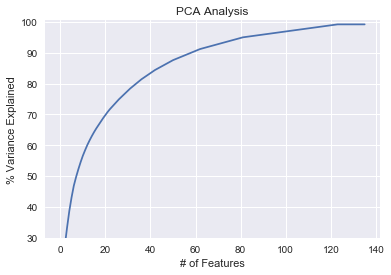

In [56]:
plt.ylabel('% Variance Explained')
plt.xlabel('# of Components')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')


plt.plot(var)

95% variance is explained by 80 components whereas to just explain another 5 % variance a total of 140 components are required.
 
Therefore, selecting the first 60 components for building classification model which can explain a total of 90%

In [58]:
## PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.90)
#need to fit transform the test data in similar way before predicting
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.314581,0.599912,0.071713,-0.369022,-0.283923,-0.634363,0.429417,0.345233,-0.153416,0.360345,...,-0.087038,0.078120,0.040553,0.034618,0.058393,-0.091967,0.071373,-0.168335,0.003033,-0.040082
1,-0.851578,-0.800850,-0.384635,-0.320565,0.402787,0.292741,0.329512,-0.032229,0.127883,-0.093934,...,0.042464,0.042645,0.037035,-0.013272,0.057427,-0.074813,-0.089975,-0.024229,0.021935,-0.060937
2,-1.100024,1.032176,0.103204,0.247589,0.377259,0.168628,0.230955,0.693831,0.207992,-0.142524,...,0.470427,-0.112274,-0.010318,0.239513,0.163823,-0.395394,0.033001,-0.461186,0.068252,0.378509
3,0.781607,-0.714912,0.027404,0.183441,-1.081315,0.219100,0.513715,0.338891,0.225024,0.007782,...,0.049648,0.009196,-0.003884,-0.138965,0.058514,-0.033507,-0.027227,-0.024606,-0.025526,-0.212915
4,1.495370,0.219858,0.126741,-0.081379,0.354040,0.244107,0.331437,0.017272,0.034898,-0.255759,...,0.133934,-0.096941,0.034755,0.005653,0.056492,0.009090,-0.090120,0.001716,0.065190,0.055072


In [ ]:
X_LDtest = pca.transform(X_test)
